In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import Model
from keras import Input
from keras.utils import plot_model
from keras.layers import concatenate
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras import backend as K

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import scipy.io as sio
import os

%matplotlib inline

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [15]:
imgloc_train = []
label_train = []

imgloc_val = []
label_val = []

for dirname, _, filenames in os.walk('..\Train\Adults'):
    for filename in filenames[:-50]:
        imgloc_train.append((os.path.join(dirname, filename)))
        label_train.append(0)
    for filename in filenames[-50:]:
        imgloc_val.append((os.path.join(dirname, filename)))
        label_val.append(0)
        
for dirname, _, filenames in os.walk('..\Train\Teenagers'):
    for filename in filenames[:-50]:
        imgloc_train.append((os.path.join(dirname, filename)))
        label_train.append(1)
    for filename in filenames[-50:]:
        imgloc_val.append((os.path.join(dirname, filename)))
        label_val.append(1)
        
for dirname, _, filenames in os.walk('..\Train\Toddler'):
    for filename in filenames[:-50]:
        imgloc_train.append((os.path.join(dirname, filename)))
        label_train.append(2)
    for filename in filenames[-50:]:
        imgloc_val.append((os.path.join(dirname, filename)))
        label_val.append(2)

In [16]:
img_train = []
img_val = []

for i in range(0, len(imgloc_train)):
    img1 = cv2.imread(imgloc_train[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(224,224))
    img_train.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
    
for i in range(0, len(imgloc_val)):
    img1 = cv2.imread(imgloc_val[i],1)
    img2 = np.array(img1)
    img2 = cv2.resize(img2,(224,224))
    img_val.append(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [17]:
img_train = np.array(img_train)
label_train = np.array(label_train).reshape(-1,1)

img_val = np.array(img_val)
label_val = np.array(label_val).reshape(-1,1)

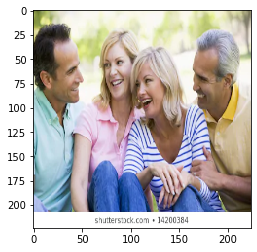

In [18]:
i = 5
plt.imshow(img_train[i])
plt.imshow(img_val[i])

In [19]:
img_train.shape

(2439, 224, 224, 3)

In [20]:
x_train = img_train/255
x_val = img_val/255

In [21]:
enc_y = OneHotEncoder(handle_unknown='ignore')
enc_y.fit(label_train)
y_train = enc_y.transform(label_train).toarray()
y_val = enc_y.transform(label_val).toarray()

In [22]:
x_train.shape

(2439, 224, 224, 3)

In [23]:
y_train.shape

(2439, 3)

In [24]:
# reg = l2(1e-3)
reg = None

model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', input_shape = x_train[0].shape,
                 kernel_regularizer = reg, padding='same'))
model.add(Conv2D(64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(256, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))
model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(512, kernel_size = (3, 3), strides = (1, 1), activation = 'relu',
                 padding='same', kernel_regularizer = reg))

model.add(Flatten())

model.add(Dense(4096, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(4096, activation = 'relu', kernel_regularizer = reg))
model.add(Dense(3, activation = 'softmax', kernel_regularizer = reg))

# model.load_weights('LeNet.h5')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 56, 56, 256)      

In [27]:
adam = Adam(learning_rate = 0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics = ['categorical_accuracy'])

In [ ]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('VGG-16.h5', monitor='loss', mode='min', save_best_only=True, verbose=1)
callbacks = [es, mc]

history = model.fit(
    x = x_train,
    y = y_train,
    epochs=20, batch_size=32,
    validation_data = (x_val,y_val),
    verbose = 1, callbacks = callbacks)

In [ ]:
model = load_model('VGG-16.h5')

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='val')
plt.legend()
plt.show()

In [ ]:
#loss 0.92
#acc 0.57
model.evaluate(x_val,y_val)

In [ ]:
ymodel = model.predict(x_val)
ymodel = enc_y.inverse_transform(ymodel)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
confusion_matrix(label_val,ymodel)

In [ ]:
f1_score(label_val,ymodel,average='weighted')

In [ ]:
precision_recall_fscore_support(label_val,ymodel)